In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('issuesClose.csv')

In [3]:
# Chuyển đổi định dạng cột `Date Appear` và `Solve Date` sang datetime
df['Date Appear'] = pd.to_datetime(df['Date Appear'])
df['Solve Date'] = pd.to_datetime(df['Solve Date'])

In [4]:
# Tính toán thời gian giải quyết cho mỗi vấn đề (theo đơn vị giây)
df['Time to Solve'] = (df['Solve Date'] - df['Date Appear']).dt.total_seconds()

In [5]:
# Tính trung bình thời gian giải quyết
average_time_to_solve = df['Time to Solve'].mean()

In [6]:
# Chuyển đổi thời gian trung bình từ đơn vị giây sang đơn vị mong muốn (ví dụ: ngày)
average_time_to_solve_in_days = average_time_to_solve / 86400

In [7]:
# In kết quả
print(f"Thời gian trung bình để giải quyết một vấn đề là: {average_time_to_solve_in_days:.2f} ngày")

Thời gian trung bình để giải quyết một vấn đề là: 41.74 ngày


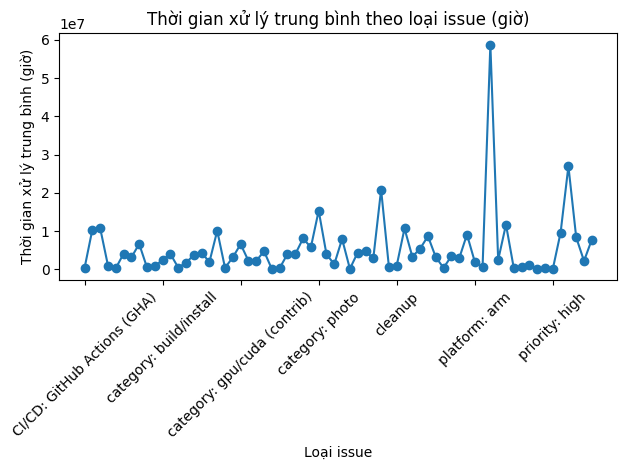

In [8]:
# Nhóm dữ liệu theo loại issue (Type)
grouped_data = df.groupby("Type")["Time to Solve"].mean()

# Vẽ biểu đồ đường
grouped_data.plot(kind="line", marker="o", colormap="tab10")

# Thêm tiêu đề, nhãn trục và chú thích
plt.title("Thời gian xử lý trung bình theo loại issue (giờ)")
plt.xlabel("Loại issue")
plt.ylabel("Thời gian xử lý trung bình (giờ)")
plt.xticks(rotation=45)  # Xoay nhãn trục x nghiêng 45 độ để dễ đọc hơn

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()